In [13]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix, init_printing, matrix2numpy, diag
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
descriptions=pd.read_excel('../data/proshares_analysis_data.xlsx')
descriptions

,Unnamed: 0,security_name
0,EEM US Equity,iShares MSCI Emerging Markets
1,EFA US Equity,iShares MSCI EAFE ETF
2,EUO US Equity,ProShares UltraShort Euro
3,HDG US Equity,ProShares Hedge Replication ET
4,HEFA US Equity,iShares Currency Hedged MSCI E
5,HFRIFWI Index,HFR Fund Wghted Comp
6,IWM US Equity,iShares Russell 2000 ETF
7,MLEIFCTR Index,Merrill Lynch Factor Model Ind
8,MLEIFCTX Index,Merrill Lynch Factor Model Exc
9,QAI US Equity,IndexIQ ETF Trust - IQ Hedge M


In [15]:
df_hf=pd.read_excel('../data/proshares_analysis_data.xlsx',sheet_name='hedge_fund_series')
df_mf=pd.read_excel('../data/proshares_analysis_data.xlsx',sheet_name='merrill_factors')

In [25]:
def maxDrawD(ser):
    inde=ser.index
    peak=ser.index[0]
    trough=ser.index[0]
    recovery=ser.index[0]
    dd=0
    res={
        'peak':peak,
        'trough':trough,
        'recovery':recovery,
        'drawdown':dd
    }
    # for i in range(len(inde)):
    #     dd+=ser[inde[i+1]]-ser[inde[i]]
    #     if dd+ser[inde[i+1]]<ser[trough]:
    #         trough=ser[inde[i+1]]
    #         print(ser[peak])
    #         res['drawdown']=ser[peak]-ser[trough]
    #     elif ser[inde[i+1]]>=ser[peak]:
    #         recovery=inde[i+1]
    #         peak=recovery
    #         res['recovery']=recovery
    #         res['peak']=peak
    #         trough=peak
    #         dd=0
    
    return res



def calculate_statistics(df):
    res={}
    res_i={}
    for i in df.columns:
        if df[i].dtype=='<M8[ns]':
            pass
        else:
            res_i.update({'mean_an':np.mean(df[i])*12})
            res_i.update({'volatility_an':np.std(df[i])*(12**(1/2))})
            res_i.update({'sharpe_an':res_i['mean_an']/res_i['volatility_an']})
            res_i.update({'skewness':skew(df[i])})
            res_i.update({'kurtosis':kurtosis(df[i])})
            res_i.update({'VaR':df[i].quantile(0.05)})
            res_i.update({'CVaR':df[i][df[i]<df[i].quantile(0.05)].mean()})
            res_i.update({'Max_Drawdown':maxDrawD(df[i])})
            res.update({i:res_i})
            res_i={}
    return res

In [26]:
stats=calculate_statistics(df_hf)
pd.DataFrame(stats)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
mean_an,0.043223,0.031885,0.030399,0.020513,0.019611
volatility_an,0.06002,0.056769,0.05661,0.059162,0.049889
sharpe_an,0.720155,0.561661,0.536997,0.346731,0.393086
skewness,-0.972971,-0.253173,-0.239306,-0.241428,-0.453604
kurtosis,5.675092,1.566407,1.534748,1.678181,1.637149
VaR,-0.02513,-0.028656,-0.028927,-0.031158,-0.020086
CVaR,-0.037478,-0.035857,-0.035816,-0.037576,-0.032696
Max_Drawdown,"{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd..."


In [34]:
tstats=calculate_statistics(df_mf)
pd.DataFrame(tstats)

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
mean_an,0.13324,0.009383,0.022761,0.057936,0.058296,0.104434
volatility_an,0.14544,0.004007,0.185531,0.155278,0.15624,0.193513
sharpe_an,0.916114,2.342012,0.122682,0.373109,0.373115,0.539675
skewness,-0.406919,1.778734,-0.060043,-0.26026,0.404828,-0.341736
kurtosis,0.720503,2.467157,1.075412,0.876448,0.467375,1.629217
VaR,-0.068038,0.000002,-0.084537,-0.076973,-0.058747,-0.088823
CVaR,-0.086661,-0.000004,-0.114235,-0.098378,-0.077736,-0.116966
Max_Drawdown,"{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd...","{'peak': 0, 'trough': 0, 'recovery': 0, 'drawd..."


In [27]:
spy_name=df_mf.columns[1]
def calculate_market_statistics(df,regressors):
    res={}
    res_i={}
    for i in df.columns:
        if df[i].dtype=='<M8[ns]':
            pass
        else:
            model=LinearRegression()
            model.fit(np.array(regressors).reshape(-1,1),df[i])
            alpha=model.intercept_
            beta=model.coef_[0]
            res_i.update({'alpha':alpha})
            res_i.update({'market_beta':beta})
            res_i.update({'treynor_ratio':np.mean(df[i])/beta})

            residuals=np.array(df[i])-model.predict(np.array(regressors).reshape(-1,1))
            res_i.update({'information_ratio':alpha/(np.std(residuals))})

            res.update({i:res_i})
            res_i={}
    return res



In [28]:
market_stats=calculate_market_statistics(df_hf,df_mf[spy_name])
pd.DataFrame(market_stats)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
alpha,-0.000270,-0.001225,-0.001334,-0.002281,-0.001653
market_beta,0.348706,0.349620,0.348325,0.359366,0.296053
treynor_ratio,0.010329,0.007600,0.007273,0.004757,0.005520
information_ratio,-0.029121,-0.168095,-0.182956,-0.285016,-0.227235


Text(0.5, 1.0, 'Correlation Heatmap')

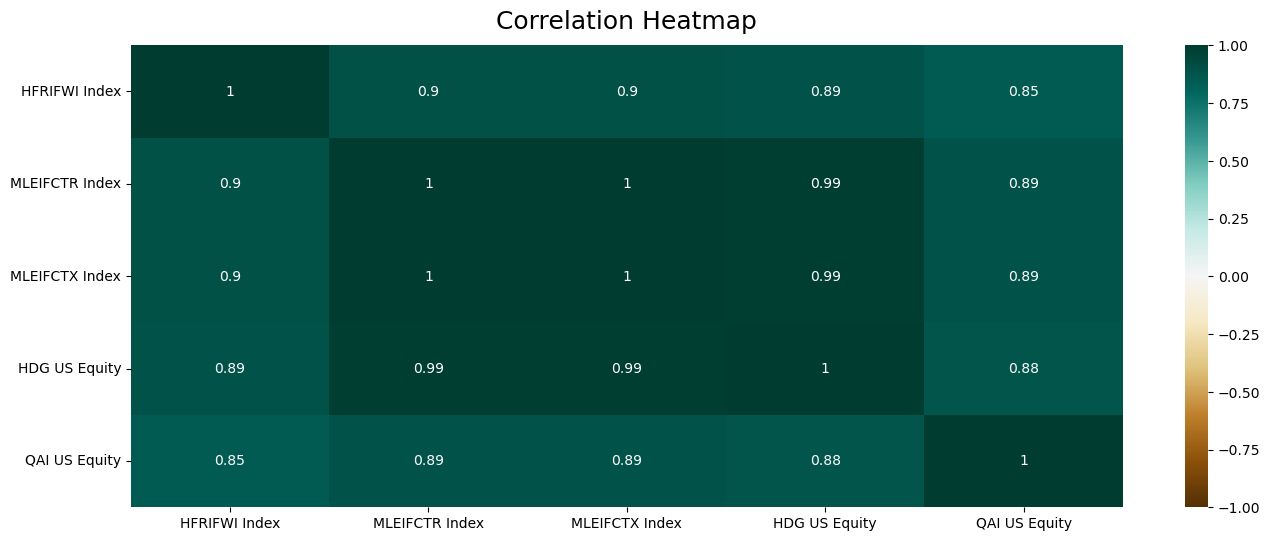

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_hf.iloc[:,1:].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [30]:
df_hf.iloc[:,1:].corr()

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
HFRIFWI Index,1.000000,0.896947,0.896296,0.886021,0.847084
MLEIFCTR Index,0.896947,1.000000,0.999921,0.987349,0.890510
MLEIFCTX Index,0.896296,0.999921,1.000000,0.987167,0.890098
HDG US Equity,0.886021,0.987349,0.987167,1.000000,0.876680
QAI US Equity,0.847084,0.890510,0.890098,0.876680,1.000000


In [31]:
X=df_mf.iloc[:,1:].copy()
y=df_hf[df_hf.columns[1]].copy() #'HFRIFWI Index'
model=LinearRegression()
model.fit(X,y)
alpha=model.intercept_
betas=model.coef_
res_i={}
res_i.update({'alpha':alpha})
res_i.update({'market_beta':betas})
pred=model.predict(X)
res_i.update({'R2':r2_score(y,pred)})
res_i.update({'Vol_er':np.std(np.array(y)-pred)})
res_i

{'alpha': 0.0013827959636750048,
 'market_beta': array([ 0.03330796, -0.16590786,  0.07785673,  0.08241002,  0.02264931,
         0.15207443]),
 'R2': 0.8369008483806359,
 'Vol_er': 0.006997263415027149}

In [32]:
repl=np.array(())
res_i={}
for i in range(60,len(y)-1):
    ty=y[i-60:i].copy()
    model=LinearRegression()
    model.fit(X.iloc[i-60:i,:].copy(),y[i-60:i])
    repl=np.concatenate((repl,model.predict(X.iloc[i+1:i+2,:])))
res_i.update({'R2':r2_score(y[61:],repl)})
res_i.update({'Vol_er':np.std(np.array(y[61:])-repl)})
res_i    


{'R2': 0.8004861741162395, 'Vol_er': 0.008515221661350337}

In [33]:
X=df_mf.iloc[:,1:].copy()
y=df_hf[df_hf.columns[1]].copy() #'HFRIFWI Index'
model=LinearRegression(fit_intercept=False)
model.fit(X,y)
alpha=model.intercept_
betas=model.coef_
res_i={}
res_i.update({'alpha':alpha})
res_i.update({'market_beta':betas})
pred=model.predict(X)
res_i.update({'R2':r2_score(y,pred)})
res_i.update({'Vol_er':np.std(np.array(y)-pred)})
res_i

{'alpha': 0.0,
 'market_beta': array([0.0508578 , 0.33778714, 0.07763866, 0.07525306, 0.02563619,
        0.14855619]),
 'R2': 0.8330078484444408,
 'Vol_er': 0.007029657775140434}